In [48]:
import yfinance as yf
import pickle
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # Not optimizing for performance

In [49]:
with open('ind_nifty50list.csv') as fp:
    text = fp.read()
    rows = text.split('\n')
    stocks = [row.split(',')[2] + '.NS' for row in rows if len(row) > 0]
try:
    # Try loading from disk and if it fails then download from internet and save to disk
    with open('nifty50-5y.pkl', 'rb') as fp:
        hist = pickle.load(fp)
        print("Loaded data from disk")
except:    
    stocks_str = ' '.join(stocks[1:])
    hist = yf.download(stocks_str, period="5y")
    print("Downloaded data")
    hist.to_pickle('nifty50-5y.pkl')
    print("Saved to disk")

Loaded data from disk


In [50]:
for stock in stocks[1:]:
    hist[('Prev. Close', stock)] = hist[('Close', stock)].shift(1)


In [51]:

for stock in stocks[1:]:
    hist[('Return', stock)] = hist[('Close', stock)] / hist[('Prev. Close', stock)]

In [53]:
hist['Return'].dropna(inplace=True)

/var/folders/2f/9jzdgmzs6xq0fzpv56h5wln40000gp/T/ipykernel_89698/4099255047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Return'].dropna(inplace=True)


In [56]:
corr = hist['Return'].corr()

In [66]:
thresh = 0.1
for stock in stocks[1:]:
    if len(corr[corr[stock]<thresh]) > 0:
        print(f"-----{stock}-----")
        print(corr[corr[stock] < thresh][stock])

-----BAJFINANCE.NS-----
CIPLA.NS    0.099112
Name: BAJFINANCE.NS, dtype: float64
-----CIPLA.NS-----
BAJFINANCE.NS    0.099112
Name: CIPLA.NS, dtype: float64


<Axes: xlabel='Date'>

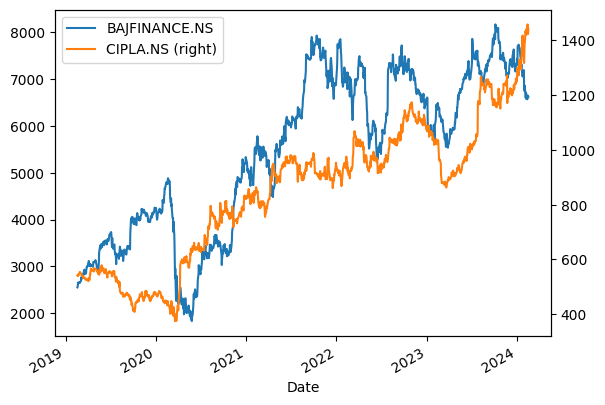

In [70]:
hist['Close'][['BAJFINANCE.NS', 'CIPLA.NS']].plot(secondary_y='CIPLA.NS')